# Santiago Cepeda Vargas - Tarea 5 Análisis de Datos - Regresión LinearTitanic

In [161]:
#Importamos las bibliotecas necesarias
import numpy as np #Librerias para el cálculo numérico y el análisis de datos
import pandas as pd #Librerias para el manejo y análisis de estructuras de datos
import seaborn as sns #Librerias para la creación de gráficos estadísticos
import matplotlib.pyplot as plt #Librerias para creación de gráficos en dos dimensiones
import statsmodels.api as sm

import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones
from tabulate import tabulate # Creación de tablas de texto

# Librerías generales
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

#Librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# librerías de para la evaluación del modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
#Librería para evitar advertencias
import warnings
warnings.filterwarnings('ignore')

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [24]:
#Cargamos el dataset "heart_cleveland_upload" para la regresión logistica
data = pd.read_csv('C:/Users/Usuario/Desktop/ANALISIS DE DATOS FINAL/Datasets/Titanic-Dataset.csv')

In [22]:
#Visualizamos la descripción de los datos
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
#Comprobamos valores faltantes por columna
print("\nValores faltantes por columna:")
print(tabulate(data.isnull().sum().reset_index(), headers=['Column', 'Missing Values'], tablefmt='psql'))


Valores faltantes por columna:
+----+-------------+------------------+
|    | Column      |   Missing Values |
|----+-------------+------------------|
|  0 | PassengerId |                0 |
|  1 | Survived    |                0 |
|  2 | Pclass      |                0 |
|  3 | Name        |                0 |
|  4 | Sex         |                0 |
|  5 | Age         |              177 |
|  6 | SibSp       |                0 |
|  7 | Parch       |                0 |
|  8 | Ticket      |                0 |
|  9 | Fare        |                0 |
| 10 | Cabin       |              687 |
| 11 | Embarked    |                2 |
+----+-------------+------------------+


In [32]:
#Comprobamos que no existen registros vacíos ni datos atípicos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

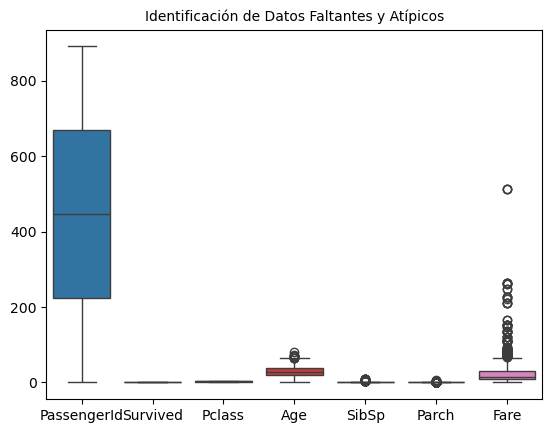

In [28]:
#Identificamos datos faltantes y atípicos
sns.boxplot(data=data)
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [34]:
#Revisamos si existen datos faltantes en las columnas que seleccionamos para estudiar, 
print("Cantidad de Registros Vacios en AGE: ",data['Age'].isnull().sum())
print("Cantidad de Registros con cero en AGE: ",data['Age'].isin([0]).sum())
print("Cantidad de Registros Vacios en CABIN: ",data['Cabin'].isnull().sum())
print("Cantidad de Registros con cero en CABIN: ",data['Cabin'].isin([0]).sum())
print("Cantidad de Registros Vacios en EMBARKED: ",data['Embarked'].isnull().sum())
print("Cantidad de Registros con cero en EMBARKED: ",data['Embarked'].isin([0]).sum())

Cantidad de Registros Vacios en AGE:  177
Cantidad de Registros con cero en AGE:  0
Cantidad de Registros Vacios en CABIN:  687
Cantidad de Registros con cero en CABIN:  0
Cantidad de Registros Vacios en EMBARKED:  2
Cantidad de Registros con cero en EMBARKED:  0


In [38]:
#Reemplazamos los valores nulos en las columnas seleccionadas por 0 
data['Age'].fillna(0, inplace=True)
data['Cabin'].fillna(0, inplace=True)
data['Embarked'].fillna(0, inplace=True)

In [42]:
#Comprobamos
print("Cantidad de Registros Vacios en AGE: ",data['Age'].isnull().sum())
print("Cantidad de Registros Vacios en CABIN: ",data['Cabin'].isnull().sum())
print("Cantidad de Registros Vacios en EMBARKED: ",data['Embarked'].isnull().sum())

Cantidad de Registros Vacios en AGE:  0
Cantidad de Registros Vacios en CABIN:  0
Cantidad de Registros Vacios en EMBARKED:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

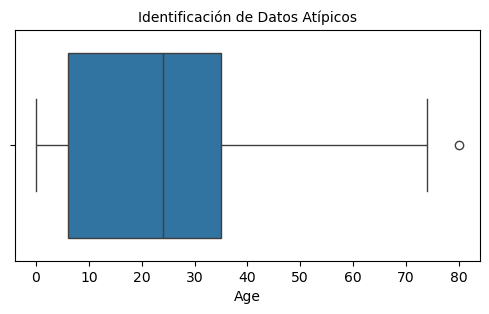

In [46]:
#Identificamos datos atípicos en las columnas
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [52]:
#Realizamos un conteo de Datos Atípicos
#Columna Age
min_lvl=0
max_lvl=100
total_atp=((data['Age']<min_lvl)|(data['Age']>max_lvl)).sum()
print("El total de datos atípicos es {}".format(total_atp))

El total de datos atípicos es 0


In [54]:
#Revisamos la información del dataset, comprobando en total si existen datos atipicos o faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [199]:
# Convertimos los datos en un DataFrame
df = pd.DataFrame(data)
# Determinamos las variables independientes (Age) y dependiente (Survived)
X = df[['Age']]
y = df['Survived']
# Creamos el modelo de regresión lineal
model = LinearRegression()
# Ajustamos el modelo a los datos
model.fit(X, y)

LinearRegression()

### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [201]:
#Dividimos el dataset en entrenamiento y prueba, usando un 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#Mostramos el train X
print (X_train)

      Age
692   0.0
481   0.0
527   0.0
855  18.0
801  31.0
..    ...
359   0.0
258  35.0
736  48.0
462  47.0
507   0.0

[712 rows x 1 columns]


In [203]:
#Mostramos el train y
print (y_train)

692    1
481    0
527    0
855    1
801    1
      ..
359    1
258    1
736    0
462    0
507    1
Name: Survived, Length: 712, dtype: int64


### 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [205]:
#Creamos el modelo de regresión logística 
model_r = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
model_r.fit (X_train , y_train)   
#Creamos el modelo de predicción
pred = model_r.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [207]:
#Mostramos la prueba y
print (y_test)

565    0
160    0
553    1
860    0
241    1
      ..
880    1
91     0
883    0
473    1
637    0
Name: Survived, Length: 179, dtype: int64


In [209]:
#Mostramos la predicción
print (pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [211]:
#Comprobamos el desempeño del modelo de regresión
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

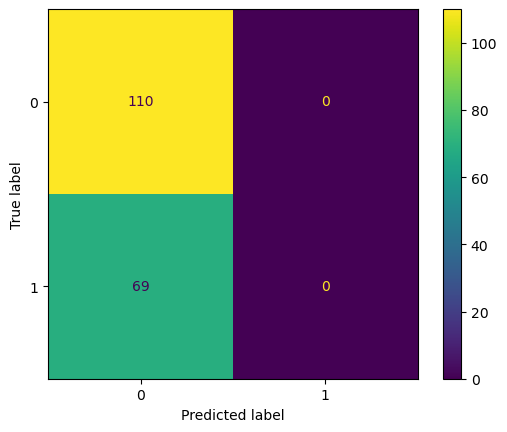

In [213]:
#Comprobamos la matrix de Confusión del modelo
cm=confusion_matrix(y_test,pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

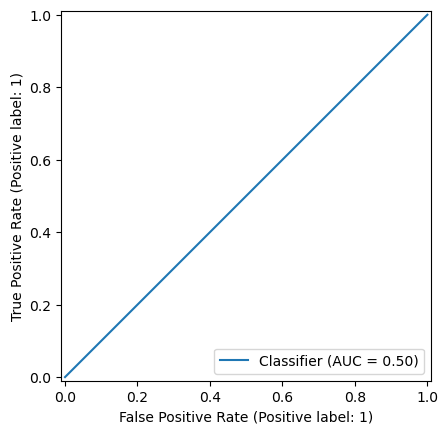

In [215]:
#Comprobamos la curva de precisón del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, pred)
plt.show()